### import library

In [1]:
import torch
torch.cuda.is_available() # is GPU available

ModuleNotFoundError: No module named 'torch'

In [8]:
from tethysts import Tethys
from windrose import WindroseAxes
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from encn_helper import *

In [9]:
ts = Tethys()

In [10]:
datasets = ts.datasets

### get dataset id based on names

In [14]:
ws_dataset_id = get_dataset_id("wind_speed","raw_data","FENZ",ts)

In [15]:
wd_dataset_id = get_dataset_id("wind_direction","raw_data","FENZ",ts)

### get station data based on names

In [7]:
station_name = "Snowdon" #get the station names of which you want to look at
station_id = get_station_id(ws_dataset_id,station_name,ts)
ws_station=ts.get_results(ws_dataset_id, station_id, squeeze_dims=True, output='Dataset')
wd_station=ts.get_results(wd_dataset_id, station_id, squeeze_dims=True, output='Dataset')
# convert utc to local time
ws_station=ds_utc_local(ws_station)
wd_station=ds_utc_local(wd_station)

### plot time series of a certain period

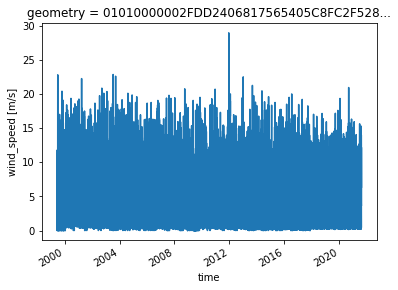

In [7]:
ws_station["wind_speed"].plot()

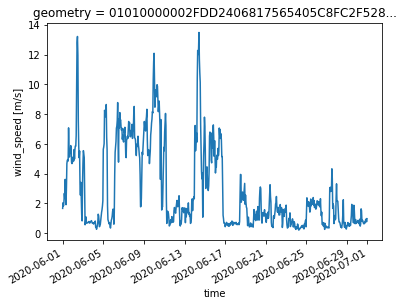

In [8]:
ws_station["wind_speed"].sel(time=slice("2020-06-01", "2020-06-30")).plot()

### plot hourly composite

In [9]:
ws_selected = ws_station["wind_speed"].sel(time=slice("2020-01-01", "2020-02-01"))
wd_selected = wd_station["wind_direction"].sel(time=slice("2020-01-01",  "2020-02-01"))

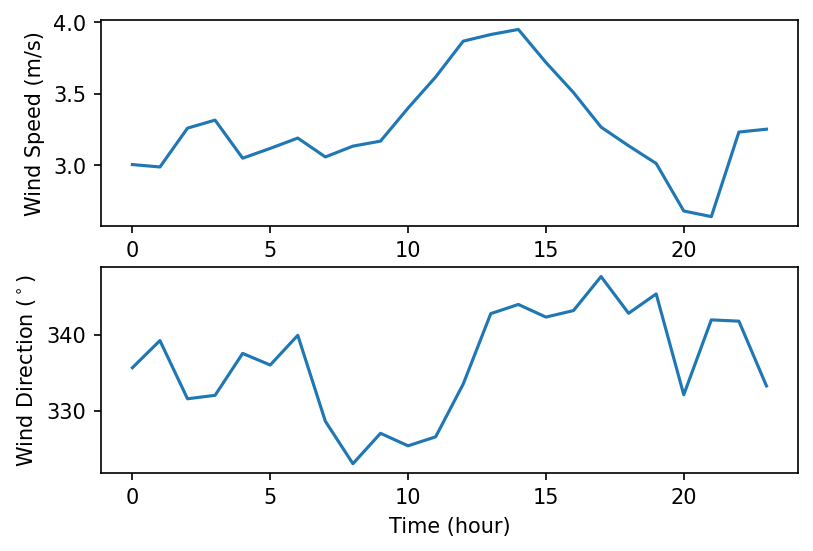

In [10]:
wind_hourly_composite(ws_selected,wd_selected,save_files=True)

## plot windrose

In [11]:
wspeed = ws_station.sel(time=slice("2020-01-01", "2020-02-01"))
wdir   = wd_station.sel(time=slice("2020-01-01", "2020-02-01"))

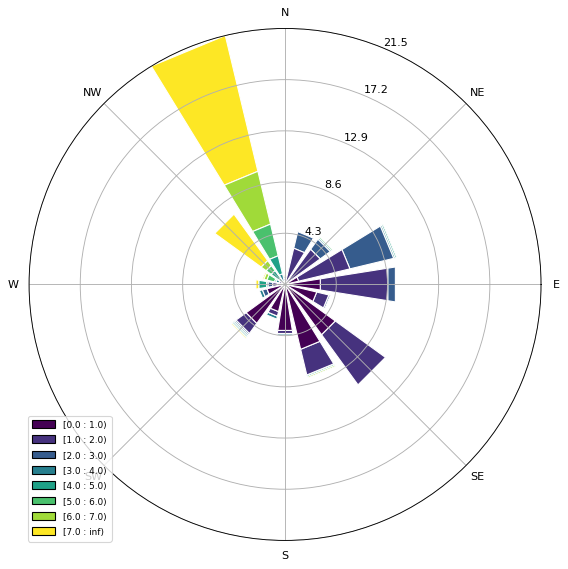

In [12]:
plot_wind_rose(wspeed,wdir)

### hourly graph

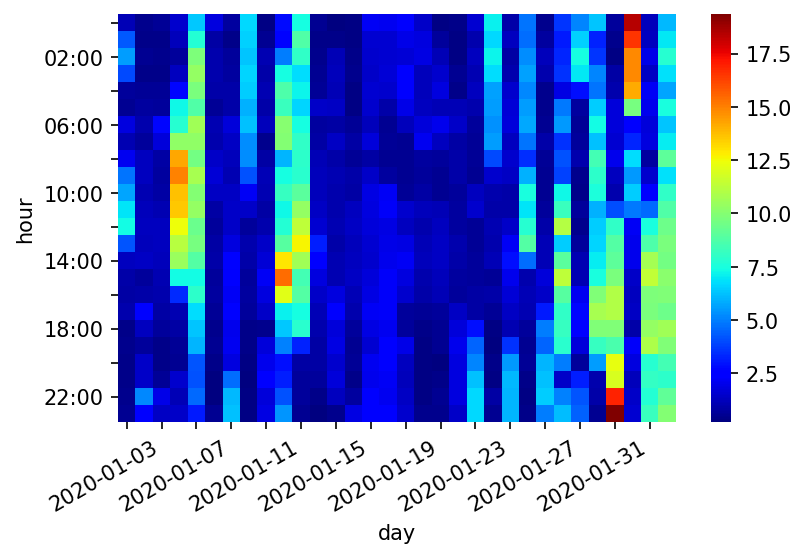

In [13]:
plot_hourly_composite(wspeed["wind_speed"],average="day",save_files=True,cmap="jet")

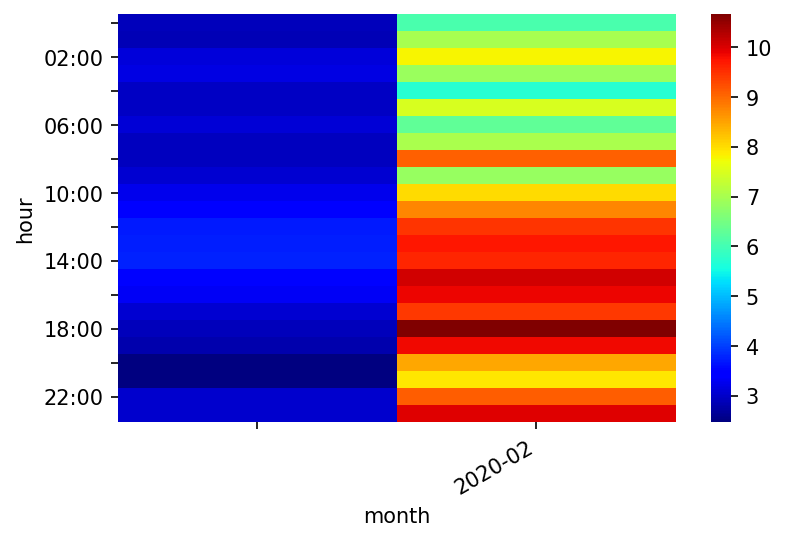

In [14]:
plot_hourly_composite(wspeed["wind_speed"],average="month",save_files=True,cmap="jet")

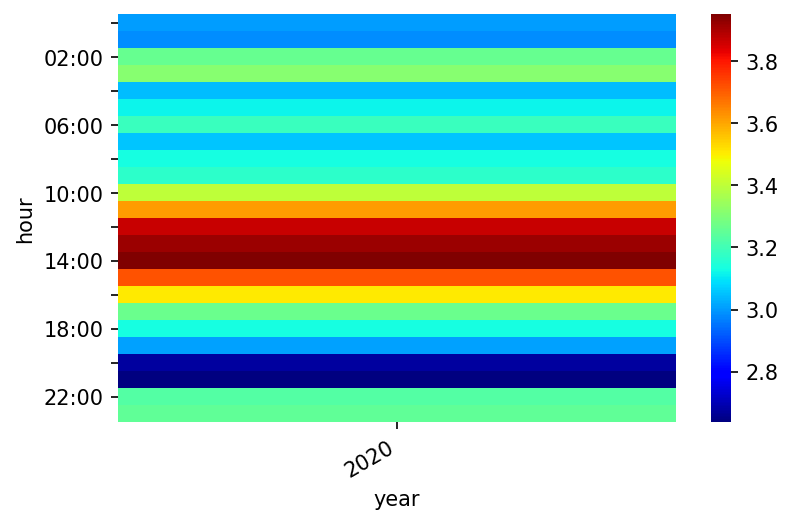

In [15]:
plot_hourly_composite(wspeed["wind_speed"],average="year",save_files=True,cmap="jet")

### export data

In [16]:
# change "ws_station" to whatever data variable you want to save,
# change "savefile.csv" to whatever you want to name it.
ws_station.to_dataframe().to_csv("savefile.csv")

# Advanced

### advanced multiple stations

In [58]:
station_names = [ "Snowdon","Southbridge"] #get the station names of which you want to look at
station_ids = get_station_id(ws_dataset_id,station_names,ts)
ws_stations=ts.get_bulk_results(ws_dataset_id, station_ids, squeeze_dims=True, output='Dataset')
wd_stations=ts.get_bulk_results(wd_dataset_id, station_ids, squeeze_dims=True, output='Dataset')

### get stations id(s) based on lat lon

In [19]:
lat = -43.50361
lon = 171.65068
distance = 1000

In [20]:
nearest_station=ts.get_stations(ws_dataset_id, lat=lat, lon=lon)[0]
nearest_station_id = nearest_station['station_id']

In [21]:
nearest_station_list = ts.get_stations(ws_dataset_id, lat=lat, lon=lon,distance=distance)
nearest_station_id_list = [station['station_id'] for station in nearest_station_list]

In [22]:
nearest_station_list

[{'station_id': '197925525b216f48140c1249',
  'ref': 'stewart_island',
  'name': 'Stewart Island',
  'geometry': {'type': 'Point', 'coordinates': [168.11253, -46.89083]},
  'properties': {'externalId': {'data': 'CLIDB_41088',
    'attrs': {'long name': 'The unique id assigned by NIWA for internal interoperation'}}},
  'dataset_id': '0b2bd62cc42f3096136f11e9',
  'dimensions': {'geometry': 1, 'height': 1, 'time': 55731},
  'heights': [2.0],
  'time_range': {'from_date': '2015-07-01T01:00:00',
   'to_date': '2021-11-08T19:00:00'},
  'stats': {'min': 0.0,
   'max': 10.33,
   'mean': 2.06,
   'median': 1.77,
   'count': 55731},
  'modified_date': '2021-10-24T20:00:03'},
 {'station_id': 'd3d8876acc87517bed173fe2',
  'ref': 'tisbury',
  'name': 'Tisbury',
  'geometry': {'type': 'Point', 'coordinates': [168.39772, -46.44182]},
  'properties': {'externalId': {'data': 'CLIDB_40449',
    'attrs': {'long name': 'The unique id assigned by NIWA for internal interoperation'}}},
  'dataset_id': '0b2bd